In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel("CounterPartyApplicationData.xlsx")

In [3]:
data.shape

(15577, 71)

In [4]:
data.head(5)

,CounterPartyName,IMAC_ID,CIF_ID,DepartmentName,CustomerRM,App_ID,WorkflowName,PurposeOfCAM,DateOfApproval,GroupName,...,TotalFundedOutStanding,TotalNonFundedSanctioned,TotalNonFundedOutStanding,GrandTotalSanctioned,GrandTotalOutStanding,FacilityRating,MoratoriumDays,ATNW,TNW,EBITDAPer
0,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,...,0,3000000,0,3000000,0,ABC-6,NaN,0.0,0.0,0.0
1,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,...,0,3000000,0,3000000,0,ABC-6,NaN,0.0,0.0,0.0
2,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,...,0,0,0,0,0,NaN,NaN,0.0,0.0,0.0
3,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3767,APPWF_CIB,NTB Custom,2018-04-24 10:51:53.020,10841-xxxxx,...,0,150000000,0,150000000,0,ABC-7A,NaN,0.0,0.0,0.0
4,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3767,APPWF_CIB,NTB Custom,2018-04-24 10:51:53.020,10841-xxxxx,...,0,150000000,0,150000000,0,ABC-7A,NaN,0.0,0.0,0.0


In [5]:
cols=data.columns

In [6]:
cols

Index(['CounterPartyName', 'IMAC_ID', 'CIF_ID', 'DepartmentName', 'CustomerRM',
       'App_ID', 'WorkflowName', 'PurposeOfCAM', 'DateOfApproval', 'GroupName',
       'GroupID', 'CCY', 'BaseUnit', 'CustomerSince', 'Industry',
       'EWS_AL_WLDateOfSanction', 'EWS_AL_WLPresent', 'SanctionDueDate',
       'InternalRating', 'RatingAgency', 'LongTermRating', 'ShortTermRating',
       'Outlook', 'RatingDate', 'UWSDeviation', 'TOMDeviation', 'AMLGrade',
       'ApplicationRating', 'AuditYear', 'FinancialRisk', 'BusinessRisk',
       'IndustryRisk', 'ManagementRisk', 'BasicBorrowerRiskScore',
       'ProjectRisk', 'BorrowerRIskScoreWithProject', 'ConductOfAccount',
       'ApprovingAuthority', 'ActuallyApprovedBy', 'OverrideYorN',
       'OverrideReason', 'ApproverName', 'ApproverComment',
       'ApproverTimeStamp', 'UFCEProvisionAssessment', 'CRILCStatus',
       'OrignalRating', 'OverRideRating', 'Justification',
       'ProposedBankingArrangement', 'FacilityId', 'FacilityType',
       'F

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15577 entries, 0 to 15576
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   CounterPartyName              15577 non-null  object        
 1   IMAC_ID                       15577 non-null  int64         
 2   CIF_ID                        14239 non-null  object        
 3   DepartmentName                15577 non-null  object        
 4   CustomerRM                    14620 non-null  object        
 5   App_ID                        15577 non-null  object        
 6   WorkflowName                  15577 non-null  object        
 7   PurposeOfCAM                  10041 non-null  object        
 8   DateOfApproval                15577 non-null  datetime64[ns]
 9   GroupName                     6627 non-null   object        
 10  GroupID                       6627 non-null   object        
 11  CCY                         

In [8]:
data.isnull().sum()

CounterPartyName       0
IMAC_ID                0
CIF_ID              1338
DepartmentName         0
CustomerRM           957
                    ... 
FacilityRating      6720
MoratoriumDays      8706
ATNW                   0
TNW                    0
EBITDAPer              0
Length: 71, dtype: int64

In [9]:
data.isnull().sum().sum()

261514

In [10]:
data.isnull().sum()/len(data)*100

CounterPartyName     0.000000
IMAC_ID              0.000000
CIF_ID               8.589587
DepartmentName       0.000000
CustomerRM           6.143673
                      ...    
FacilityRating      43.140528
MoratoriumDays      55.890094
ATNW                 0.000000
TNW                  0.000000
EBITDAPer            0.000000
Length: 71, dtype: float64

In [11]:
null_morethan_20=data.isnull().sum()/len(data)*100 > 20

In [12]:
null_morethan_20

CounterPartyName    False
IMAC_ID             False
CIF_ID              False
DepartmentName      False
CustomerRM          False
                    ...  
FacilityRating       True
MoratoriumDays       True
ATNW                False
TNW                 False
EBITDAPer           False
Length: 71, dtype: bool

In [13]:
dropping_features=null_morethan_20[null_morethan_20==1].index

In [14]:
dropping_features

Index(['PurposeOfCAM', 'GroupName', 'GroupID', 'BaseUnit',
       'EWS_AL_WLDateOfSanction', 'EWS_AL_WLPresent', 'RatingAgency',
       'LongTermRating', 'ShortTermRating', 'Outlook', 'RatingDate',
       'AMLGrade', 'AuditYear', 'ApprovingAuthority', 'ActuallyApprovedBy',
       'ApproverName', 'ApproverComment', 'ApproverTimeStamp',
       'UFCEProvisionAssessment', 'CRILCStatus', 'OrignalRating',
       'OverRideRating', 'Justification', 'ProposedBankingArrangement',
       'ParentFAC_ID', 'FacilityRating', 'MoratoriumDays'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15577 entries, 0 to 15576
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   CounterPartyName              15577 non-null  object        
 1   IMAC_ID                       15577 non-null  int64         
 2   CIF_ID                        14239 non-null  object        
 3   DepartmentName                15577 non-null  object        
 4   CustomerRM                    14620 non-null  object        
 5   App_ID                        15577 non-null  object        
 6   WorkflowName                  15577 non-null  object        
 7   PurposeOfCAM                  10041 non-null  object        
 8   DateOfApproval                15577 non-null  datetime64[ns]
 9   GroupName                     6627 non-null   object        
 10  GroupID                       6627 non-null   object        
 11  CCY                         

In [16]:
data.shape

(15577, 71)

In [17]:
data.IsCashBackCollateral.value_counts()

No     13535
Yes      736
Name: IsCashBackCollateral, dtype: int64

<AxesSubplot:>

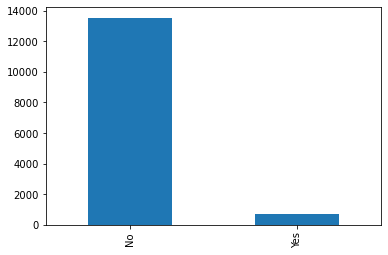

In [18]:
data.IsCashBackCollateral.value_counts().plot(kind='bar')

In [19]:
data2=data.groupby("IsCashBackCollateral")['TotalFundedSanctioned',"TotalFundedOutStanding","TotalNonFundedSanctioned","TotalNonFundedOutStanding"].sum()

C:\Users\SANJEE~1\AppData\Local\Temp/ipykernel_13068/2907719068.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data2=data.groupby("IsCashBackCollateral")['TotalFundedSanctioned',"TotalFundedOutStanding","TotalNonFundedSanctioned","TotalNonFundedOutStanding"].sum()


In [20]:
data2

,TotalFundedSanctioned,TotalFundedOutStanding,TotalNonFundedSanctioned,TotalNonFundedOutStanding
IsCashBackCollateral,,,,
No,9375736938949,1594474351000,4554185988950,365442269000
Yes,407914404045,63468406000,188357108030,36961083500


<AxesSubplot:xlabel='IsCashBackCollateral'>

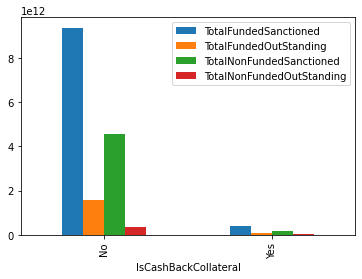

In [21]:
data2.plot(kind='bar')

In [22]:
data.head(1)

,CounterPartyName,IMAC_ID,CIF_ID,DepartmentName,CustomerRM,App_ID,WorkflowName,PurposeOfCAM,DateOfApproval,GroupName,...,TotalFundedOutStanding,TotalNonFundedSanctioned,TotalNonFundedOutStanding,GrandTotalSanctioned,GrandTotalOutStanding,FacilityRating,MoratoriumDays,ATNW,TNW,EBITDAPer
0,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,...,0,3000000,0,3000000,0,ABC-6,NaN,0.0,0.0,0.0


In [23]:
data.loc[data['TotalFundedOutStanding'] >0 , ['CounterPartyName','TotalFundedOutStanding']].sort_values(by='TotalFundedOutStanding',ascending =False)

,CounterPartyName,TotalFundedOutStanding
12598,75645-xxxxx,5824700000
12603,75645-xxxxx,5824700000
12602,75645-xxxxx,5824700000
12601,75645-xxxxx,5824700000
12600,75645-xxxxx,5824700000
...,...,...
1566,21831-xxxxx,20000
1563,21831-xxxxx,20000
1565,21831-xxxxx,20000
1560,21831-xxxxx,20000


In [24]:
data.loc[data['TotalNonFundedOutStanding'] >0 , ['CounterPartyName','TotalNonFundedOutStanding']].sort_values(by='TotalNonFundedOutStanding',ascending =False)

,CounterPartyName,TotalNonFundedOutStanding
4025,28517-xxxxx,4120000000
4026,28517-xxxxx,4120000000
4020,28517-xxxxx,4120000000
4021,28517-xxxxx,4120000000
4022,28517-xxxxx,4120000000
...,...,...
5288,32128-xxxxx,100000
5289,32128-xxxxx,100000
5290,32128-xxxxx,100000
5291,32128-xxxxx,100000


In [25]:
data.loc[data['GrandTotalOutStanding'] >0 , ['CounterPartyName','GrandTotalOutStanding']].sort_values(by='GrandTotalOutStanding',ascending =False)

,CounterPartyName,GrandTotalOutStanding
12598,75645-xxxxx,5824700000
12599,75645-xxxxx,5824700000
12601,75645-xxxxx,5824700000
12602,75645-xxxxx,5824700000
12603,75645-xxxxx,5824700000
...,...,...
15183,95700-xxxxx,1000000
15180,95700-xxxxx,1000000
12085,72394-xxxxx,500000
12084,72394-xxxxx,500000


In [26]:
#which department has highest outstanding

In [27]:
dpt_outst=data.groupby('DepartmentName')['GrandTotalOutStanding'].sum()

In [28]:
dpt_outst=dpt_outst.reset_index()

In [29]:
dpt_outst=dpt_outst.sort_values(by='GrandTotalOutStanding',ascending=False)
dpt_outst

,DepartmentName,GrandTotalOutStanding
2,C&IB,1502010584000
3,COMMERCIAL BANKING - MID CORPORATE,268235982500
4,COMMERCIAL BANKING - SME,125413140000
7,MFIs,88635200000
5,FINANCIAL INSTITUTIONS GROUP,70382100000
6,GB,2675000000
8,MNC,1431300000
9,MSME,812000000
10,NEB,443000000
1,AGRI WHOLESALE,276829000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'C&IB'),
  Text(1, 0, 'COMMERCIAL BANKING - MID CORPORATE'),
  Text(2, 0, 'COMMERCIAL BANKING - SME'),
  Text(3, 0, 'MFIs'),
  Text(4, 0, 'FINANCIAL INSTITUTIONS GROUP'),
  Text(5, 0, 'GB'),
  Text(6, 0, 'MNC'),
  Text(7, 0, 'MSME'),
  Text(8, 0, 'NEB'),
  Text(9, 0, 'AGRI WHOLESALE'),
  Text(10, 0, 'SUPPLY CHAIN FINANCE'),
  Text(11, 0, 'AGRI RETAIL'),
  Text(12, 0, 'RETAIL BRANCH BANKING')])

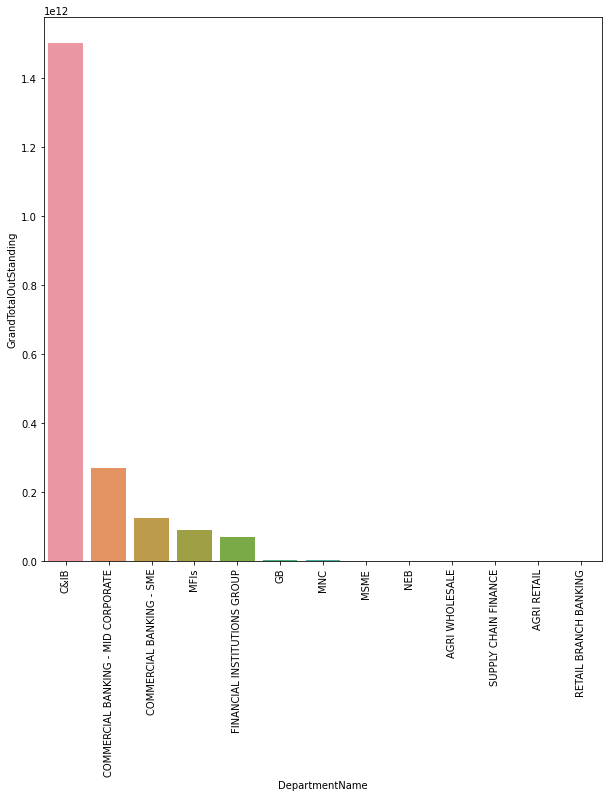

In [30]:
plt.figure(figsize=(10,10))
sns.barplot(x='DepartmentName',y='GrandTotalOutStanding',data=dpt_outst)
plt.xticks(rotation=90)

In [31]:
data.head(1)

,CounterPartyName,IMAC_ID,CIF_ID,DepartmentName,CustomerRM,App_ID,WorkflowName,PurposeOfCAM,DateOfApproval,GroupName,...,TotalFundedOutStanding,TotalNonFundedSanctioned,TotalNonFundedOutStanding,GrandTotalSanctioned,GrandTotalOutStanding,FacilityRating,MoratoriumDays,ATNW,TNW,EBITDAPer
0,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,...,0,3000000,0,3000000,0,ABC-6,NaN,0.0,0.0,0.0


In [32]:
data['WorkflowName'].value_counts()

APPWF_CIB     5328
APPWF_MME     3791
APPWF_SME     2773
SFCAWF_CIB     970
SFCAWF_MME     567
APPWF_IFI      545
APPWF_FIG      497
SFCAWF_SME     472
APPWF_AGRI     296
APPWF_G&J      163
SFCAWF_FIG      51
APPWF_GB        29
SFCAWF_IFI      25
APPWF_MNC       20
APPWF_SCF       19
SFCAWF_G&J      16
SFCAWF_SCF       8
SFCAWF_MNC       4
SFCAWF_GB        3
Name: WorkflowName, dtype: int64

In [33]:
workflow_sanc=data.groupby('WorkflowName')['GrandTotalSanctioned'].sum()

In [34]:
wfdata=pd.DataFrame(workflow_sanc).reset_index()

In [35]:
wfdata.sort_values('GrandTotalSanctioned',ascending=False,inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'APPWF_CIB'),
  Text(1, 0, 'APPWF_MME'),
  Text(2, 0, 'SFCAWF_CIB'),
  Text(3, 0, 'APPWF_FIG'),
  Text(4, 0, 'APPWF_IFI'),
  Text(5, 0, 'APPWF_SME'),
  Text(6, 0, 'SFCAWF_MME'),
  Text(7, 0, 'SFCAWF_FIG'),
  Text(8, 0, 'SFCAWF_SME'),
  Text(9, 0, 'APPWF_G&J'),
  Text(10, 0, 'APPWF_AGRI'),
  Text(11, 0, 'APPWF_GB'),
  Text(12, 0, 'APPWF_MNC'),
  Text(13, 0, 'SFCAWF_IFI'),
  Text(14, 0, 'SFCAWF_G&J'),
  Text(15, 0, 'SFCAWF_GB'),
  Text(16, 0, 'SFCAWF_MNC'),
  Text(17, 0, 'APPWF_SCF'),
  Text(18, 0, 'SFCAWF_SCF')])

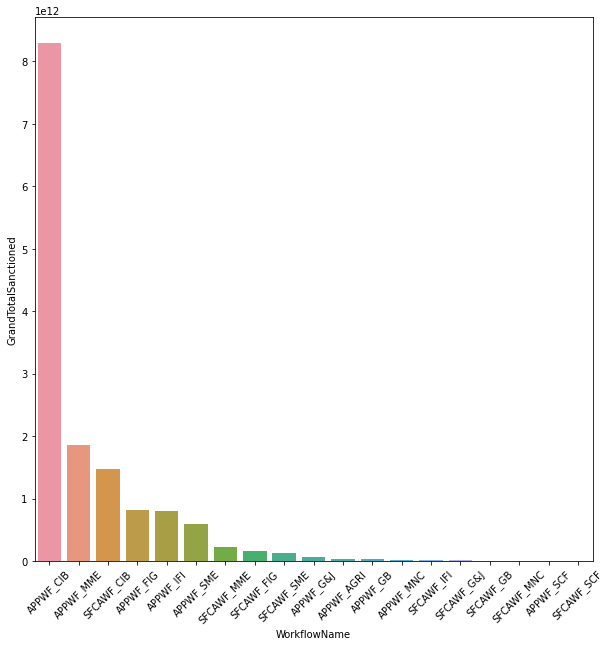

In [36]:
plt.figure(figsize=(10,10))

sns.barplot(x='WorkflowName',y='GrandTotalSanctioned',data=wfdata)

plt.xticks(rotation=45)

In [37]:
df=pd.read_excel("CounterPartyApplicationData.xlsx")

In [38]:
df.head()

,CounterPartyName,IMAC_ID,CIF_ID,DepartmentName,CustomerRM,App_ID,WorkflowName,PurposeOfCAM,DateOfApproval,GroupName,...,TotalFundedOutStanding,TotalNonFundedSanctioned,TotalNonFundedOutStanding,GrandTotalSanctioned,GrandTotalOutStanding,FacilityRating,MoratoriumDays,ATNW,TNW,EBITDAPer
0,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,...,0,3000000,0,3000000,0,ABC-6,NaN,0.0,0.0,0.0
1,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,...,0,3000000,0,3000000,0,ABC-6,NaN,0.0,0.0,0.0
2,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,...,0,0,0,0,0,NaN,NaN,0.0,0.0,0.0
3,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3767,APPWF_CIB,NTB Custom,2018-04-24 10:51:53.020,10841-xxxxx,...,0,150000000,0,150000000,0,ABC-7A,NaN,0.0,0.0,0.0
4,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3767,APPWF_CIB,NTB Custom,2018-04-24 10:51:53.020,10841-xxxxx,...,0,150000000,0,150000000,0,ABC-7A,NaN,0.0,0.0,0.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15577 entries, 0 to 15576
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   CounterPartyName              15577 non-null  object        
 1   IMAC_ID                       15577 non-null  int64         
 2   CIF_ID                        14239 non-null  object        
 3   DepartmentName                15577 non-null  object        
 4   CustomerRM                    14620 non-null  object        
 5   App_ID                        15577 non-null  object        
 6   WorkflowName                  15577 non-null  object        
 7   PurposeOfCAM                  10041 non-null  object        
 8   DateOfApproval                15577 non-null  datetime64[ns]
 9   GroupName                     6627 non-null   object        
 10  GroupID                       6627 non-null   object        
 11  CCY                         

In [40]:
df['GrandTotalSanctioned'].sum()

14526194439974

In [41]:
df['GrandTotalOutStanding'].sum()

2060346109500

In [42]:
14526194439974-2060346109500

12465848330474

In [43]:
df['AMLGrade'].isnull().sum()

6571

In [44]:
df1=df.groupby('AMLGrade')['GrandTotalSanctioned','GrandTotalOutStanding'].sum().reset_index()

C:\Users\SANJEE~1\AppData\Local\Temp/ipykernel_13068/2053783239.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1=df.groupby('AMLGrade')['GrandTotalSanctioned','GrandTotalOutStanding'].sum().reset_index()


In [45]:
df1

,AMLGrade,GrandTotalSanctioned,GrandTotalOutStanding
0,High,992084725000,240237000000
1,Low,7247326434365,1674810149500
2,Medium,899680650003,61647374000


In [46]:
df1['GrandTotalSanctioned'].sum()

9139091809368

In [47]:
14526194439974-9139091809368

5387102630606

In [48]:
df1['GrandTotalOutStanding'].sum()

1976694523500

In [49]:
2060346109500-1976694523500

83651586000

In [50]:
df['AMLGrade'].unique()

array(['Low', 'Medium', 'High', nan], dtype=object)

In [51]:
x=df['AMLGrade'].mode()
x

0    Low
dtype: object

In [52]:
df['AMLGrade1']=df['AMLGrade'].fillna('Low')

In [53]:
df.head()

,CounterPartyName,IMAC_ID,CIF_ID,DepartmentName,CustomerRM,App_ID,WorkflowName,PurposeOfCAM,DateOfApproval,GroupName,...,TotalNonFundedSanctioned,TotalNonFundedOutStanding,GrandTotalSanctioned,GrandTotalOutStanding,FacilityRating,MoratoriumDays,ATNW,TNW,EBITDAPer,AMLGrade1
0,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,...,3000000,0,3000000,0,ABC-6,NaN,0.0,0.0,0.0,Low
1,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,...,3000000,0,3000000,0,ABC-6,NaN,0.0,0.0,0.0,Low
2,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,...,0,0,0,0,NaN,NaN,0.0,0.0,0.0,Low
3,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3767,APPWF_CIB,NTB Custom,2018-04-24 10:51:53.020,10841-xxxxx,...,150000000,0,150000000,0,ABC-7A,NaN,0.0,0.0,0.0,Low
4,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3767,APPWF_CIB,NTB Custom,2018-04-24 10:51:53.020,10841-xxxxx,...,150000000,0,150000000,0,ABC-7A,NaN,0.0,0.0,0.0,Low


In [54]:
df[['AMLGrade','AMLGrade1']].head()

,AMLGrade,AMLGrade1
0,Low,Low
1,Low,Low
2,Low,Low
3,Low,Low
4,Low,Low


In [55]:
df['AMLGrade1'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [56]:
df2=df.groupby('AMLGrade1')['GrandTotalSanctioned','GrandTotalOutStanding'].sum().reset_index()

C:\Users\SANJEE~1\AppData\Local\Temp/ipykernel_13068/2861852405.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2=df.groupby('AMLGrade1')['GrandTotalSanctioned','GrandTotalOutStanding'].sum().reset_index()


In [57]:
df2

,AMLGrade1,GrandTotalSanctioned,GrandTotalOutStanding
0,High,992084725000,240237000000
1,Low,12634429064971,1758461735500
2,Medium,899680650003,61647374000


In [58]:
df1

,AMLGrade,GrandTotalSanctioned,GrandTotalOutStanding
0,High,992084725000,240237000000
1,Low,7247326434365,1674810149500
2,Medium,899680650003,61647374000


In [59]:
df2['GrandTotalSanctioned'].sum()

14526194439974

In [60]:
df1['GrandTotalSanctioned'].sum()-df2['GrandTotalSanctioned'].sum()

-5387102630606

In [61]:
df2['GrandTotalOutStanding'].sum()

2060346109500

In [62]:
df2['GrandTotalOutStanding'].sum()-df1['GrandTotalOutStanding'].sum()

83651586000

In [63]:
df.head(2)

,CounterPartyName,IMAC_ID,CIF_ID,DepartmentName,CustomerRM,App_ID,WorkflowName,PurposeOfCAM,DateOfApproval,GroupName,...,TotalNonFundedSanctioned,TotalNonFundedOutStanding,GrandTotalSanctioned,GrandTotalOutStanding,FacilityRating,MoratoriumDays,ATNW,TNW,EBITDAPer,AMLGrade1
0,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,...,3000000,0,3000000,0,ABC-6,NaN,0.0,0.0,0.0,Low
1,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,...,3000000,0,3000000,0,ABC-6,NaN,0.0,0.0,0.0,Low


In [64]:
df['ProposedBankingArrangement'].count()

8007

In [65]:
df['ProposedBankingArrangement'].unique()

array(['Sole', 'Consortium', nan, 'Multiple Arrangement',
       'Multiple Arrangement and Consortium',
       'Sole and Multiple Arrangement', 'Sole and Consortium'],
      dtype=object)

In [66]:
df['ProposedBankingArrangement'].mode()[0]

'Multiple Arrangement'

In [67]:
df['ProposedBankingArrangement'].isna().sum()

7570

In [68]:
df.groupby("ProposedBankingArrangement")['GrandTotalSanctioned'].sum().sum()

8179038275280

In [69]:
df.groupby("ProposedBankingArrangement")['GrandTotalOutStanding'].sum().sum()

1912179874500

In [70]:
df['ProposedBankingArrangement1']=df['ProposedBankingArrangement'].fillna(df['ProposedBankingArrangement'].mode()[0])

In [71]:
df.head(2)

,CounterPartyName,IMAC_ID,CIF_ID,DepartmentName,CustomerRM,App_ID,WorkflowName,PurposeOfCAM,DateOfApproval,GroupName,...,TotalNonFundedOutStanding,GrandTotalSanctioned,GrandTotalOutStanding,FacilityRating,MoratoriumDays,ATNW,TNW,EBITDAPer,AMLGrade1,ProposedBankingArrangement1
0,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,...,0,3000000,0,ABC-6,NaN,0.0,0.0,0.0,Low,Sole
1,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,...,0,3000000,0,ABC-6,NaN,0.0,0.0,0.0,Low,Sole


In [72]:
df['ProposedBankingArrangement1'].unique()

array(['Sole', 'Consortium', 'Multiple Arrangement',
       'Multiple Arrangement and Consortium',
       'Sole and Multiple Arrangement', 'Sole and Consortium'],
      dtype=object)

In [73]:
df['ProposedBankingArrangement1'].value_counts()

Multiple Arrangement                   11859
Sole                                    1802
Consortium                              1746
Multiple Arrangement and Consortium      126
Sole and Consortium                       30
Sole and Multiple Arrangement             14
Name: ProposedBankingArrangement1, dtype: int64

In [74]:
df['ProposedBankingArrangement1'].value_counts().sum()

15577

In [75]:
df.groupby("ProposedBankingArrangement1")['GrandTotalSanctioned'].sum().sum()

14526194439974

In [76]:
df.groupby("ProposedBankingArrangement1")['GrandTotalOutStanding'].sum().sum()

2060346109500

(array([0, 1, 2]),
 [Text(0, 0, 'Low'), Text(1, 0, 'Medium'), Text(2, 0, 'High')])

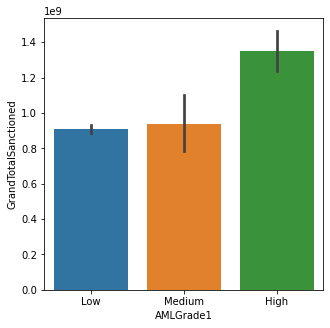

In [77]:
plt.figure(figsize=(5,5))
sns.barplot(x='AMLGrade1',y='GrandTotalSanctioned', data=df)
plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Low'), Text(1, 0, 'Medium'), Text(2, 0, 'High')])

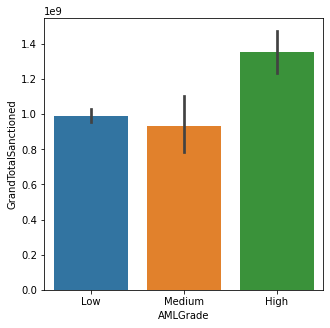

In [78]:
plt.figure(figsize=(5,5))
sns.barplot(x='AMLGrade',y='GrandTotalSanctioned', data=df)
plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Low'), Text(1, 0, 'Medium'), Text(2, 0, 'High')])

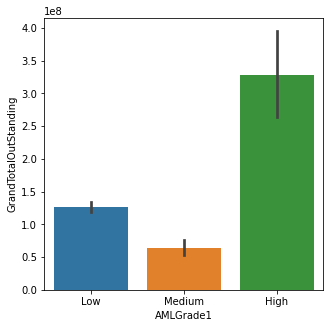

In [79]:
plt.figure(figsize=(5,5))
sns.barplot(x='AMLGrade1',y='GrandTotalOutStanding', data=df)
plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Low'), Text(1, 0, 'Medium'), Text(2, 0, 'High')])

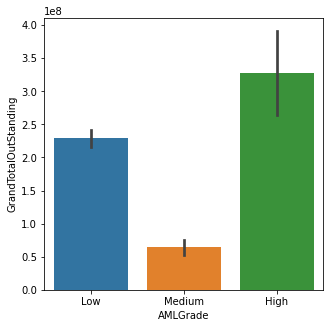

In [80]:
plt.figure(figsize=(5,5))
sns.barplot(x='AMLGrade',y='GrandTotalOutStanding', data=df)
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Sole'),
  Text(1, 0, 'Consortium'),
  Text(2, 0, 'Multiple Arrangement'),
  Text(3, 0, 'Multiple Arrangement and Consortium'),
  Text(4, 0, 'Sole and Multiple Arrangement'),
  Text(5, 0, 'Sole and Consortium')])

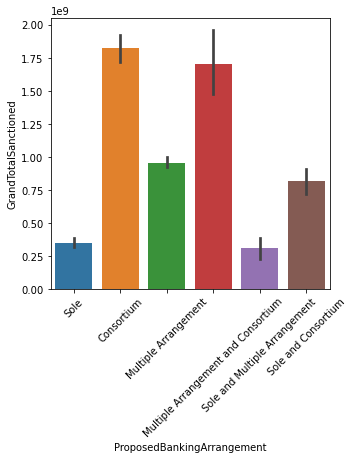

In [81]:
plt.figure(figsize=(5,5))
sns.barplot(x='ProposedBankingArrangement',y='GrandTotalSanctioned', data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Sole'),
  Text(1, 0, 'Consortium'),
  Text(2, 0, 'Multiple Arrangement'),
  Text(3, 0, 'Multiple Arrangement and Consortium'),
  Text(4, 0, 'Sole and Multiple Arrangement'),
  Text(5, 0, 'Sole and Consortium')])

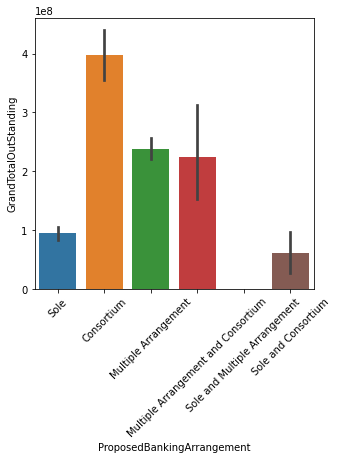

In [82]:
plt.figure(figsize=(5,5))
sns.barplot(x='ProposedBankingArrangement',y='GrandTotalOutStanding', data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Sole'),
  Text(1, 0, 'Consortium'),
  Text(2, 0, 'Multiple Arrangement'),
  Text(3, 0, 'Multiple Arrangement and Consortium'),
  Text(4, 0, 'Sole and Multiple Arrangement'),
  Text(5, 0, 'Sole and Consortium')])

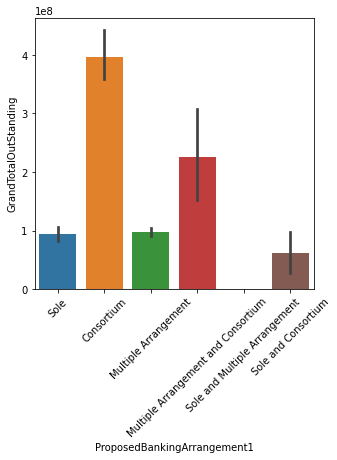

In [83]:
plt.figure(figsize=(5,5))
sns.barplot(x='ProposedBankingArrangement1',y='GrandTotalOutStanding', data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Sole'),
  Text(1, 0, 'Consortium'),
  Text(2, 0, 'Multiple Arrangement'),
  Text(3, 0, 'Multiple Arrangement and Consortium'),
  Text(4, 0, 'Sole and Multiple Arrangement'),
  Text(5, 0, 'Sole and Consortium')])

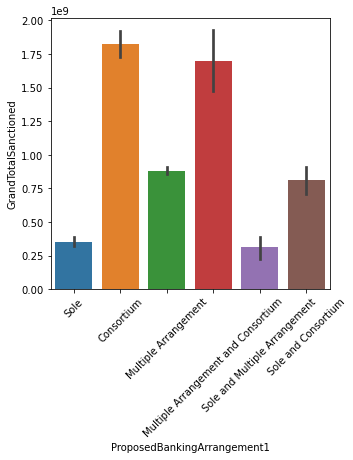

In [84]:
plt.figure(figsize=(5,5))
sns.barplot(x='ProposedBankingArrangement1',y='GrandTotalSanctioned', data=df)
plt.xticks(rotation=45)

In [85]:
df.columns 

Index(['CounterPartyName', 'IMAC_ID', 'CIF_ID', 'DepartmentName', 'CustomerRM',
       'App_ID', 'WorkflowName', 'PurposeOfCAM', 'DateOfApproval', 'GroupName',
       'GroupID', 'CCY', 'BaseUnit', 'CustomerSince', 'Industry',
       'EWS_AL_WLDateOfSanction', 'EWS_AL_WLPresent', 'SanctionDueDate',
       'InternalRating', 'RatingAgency', 'LongTermRating', 'ShortTermRating',
       'Outlook', 'RatingDate', 'UWSDeviation', 'TOMDeviation', 'AMLGrade',
       'ApplicationRating', 'AuditYear', 'FinancialRisk', 'BusinessRisk',
       'IndustryRisk', 'ManagementRisk', 'BasicBorrowerRiskScore',
       'ProjectRisk', 'BorrowerRIskScoreWithProject', 'ConductOfAccount',
       'ApprovingAuthority', 'ActuallyApprovedBy', 'OverrideYorN',
       'OverrideReason', 'ApproverName', 'ApproverComment',
       'ApproverTimeStamp', 'UFCEProvisionAssessment', 'CRILCStatus',
       'OrignalRating', 'OverRideRating', 'Justification',
       'ProposedBankingArrangement', 'FacilityId', 'FacilityType',
       'F

In [86]:
df.InternalRating.value_counts()

ABC-7A     3704
ABC-6      2954
ABC-5      2181
UnRated    1984
ABC-7B     1295
ABC-4       871
ABC-3       598
ABC-8       199
ABC-CB      183
ABC-2       145
ABC-1       119
ABC-9        39
ABC-10       18
Name: InternalRating, dtype: int64

In [87]:
df.InternalRating.nunique()

13

In [88]:
df.InternalRating.isna().sum()

1287

In [89]:
df.groupby('InternalRating')['GrandTotalSanctioned'].sum().sort_values(ascending=False)

InternalRating
ABC-6      3136116150000
ABC-7A     2524699517162
ABC-5      2412960400093
ABC-4      1888165100000
ABC-3      1285322300000
UnRated     951066141000
ABC-7B      597880154113
ABC-1       288316000000
ABC-2       269600000000
ABC-8        30609203000
ABC-10       17037500000
ABC-CB       12549275000
ABC-9         1966900000
Name: GrandTotalSanctioned, dtype: int64

In [90]:
df.InternalRating.mode()

0    ABC-7A
dtype: object

In [91]:
df.groupby('InternalRating')['GrandTotalSanctioned'].sum().sum()

13416288640368

In [92]:
df['InternalRating1']=df['InternalRating'].fillna(df['InternalRating'].mode()[0])

In [93]:
df['InternalRating1'].value_counts()

ABC-7A     4991
ABC-6      2954
ABC-5      2181
UnRated    1984
ABC-7B     1295
ABC-4       871
ABC-3       598
ABC-8       199
ABC-CB      183
ABC-2       145
ABC-1       119
ABC-9        39
ABC-10       18
Name: InternalRating1, dtype: int64

In [94]:
df['InternalRating1'].isna().sum()

0

In [95]:
df.groupby('InternalRating1')['GrandTotalSanctioned'].sum().sort_values(ascending=False)

InternalRating1
ABC-7A     3634605316768
ABC-6      3136116150000
ABC-5      2412960400093
ABC-4      1888165100000
ABC-3      1285322300000
UnRated     951066141000
ABC-7B      597880154113
ABC-1       288316000000
ABC-2       269600000000
ABC-8        30609203000
ABC-10       17037500000
ABC-CB       12549275000
ABC-9         1966900000
Name: GrandTotalSanctioned, dtype: int64

In [96]:
df.groupby('InternalRating1')['GrandTotalSanctioned'].sum().sum()

14526194439974

In [97]:
df['InternalRating2']=df['InternalRating'].ffill(axis='rows')

In [98]:
df['InternalRating2'].value_counts()

ABC-7A     3964
ABC-6      3149
ABC-5      2428
UnRated    2278
ABC-7B     1449
ABC-4       892
ABC-3       622
ABC-8       238
ABC-CB      194
ABC-2       148
ABC-1       146
ABC-9        41
ABC-10       28
Name: InternalRating2, dtype: int64

In [99]:
df.groupby('InternalRating2')['GrandTotalSanctioned'].sum().sort_values(ascending=False)

InternalRating2
ABC-6      3407594035300
ABC-7A     2729569317162
ABC-5      2570747600093
ABC-4      1894835600000
ABC-3      1321387300000
UnRated    1211021855306
ABC-7B      684544754113
ABC-1       300706000000
ABC-2       270320000000
ABC-10       61759500000
ABC-8        53892203000
ABC-CB       16769375000
ABC-9         3046900000
Name: GrandTotalSanctioned, dtype: int64

In [100]:
df.groupby('InternalRating2')['GrandTotalSanctioned'].sum().sum()

14526194439974

In [101]:
df.groupby('InternalRating')['GrandTotalOutStanding'].sum().sort_values(ascending=False)

InternalRating
ABC-7A     552928651500
ABC-4      509676800000
ABC-5      388915400000
ABC-6      302430600000
ABC-7B     124004590000
ABC-3      111648500000
ABC-2       47959500000
UnRated     18214374000
ABC-8        3094994000
ABC-CB        761400000
ABC-1         418100000
ABC-9         293200000
ABC-10                0
Name: GrandTotalOutStanding, dtype: int64

In [102]:
df.groupby('InternalRating1')['GrandTotalOutStanding'].sum().sort_values(ascending=False)

InternalRating1
ABC-7A     552928651500
ABC-4      509676800000
ABC-5      388915400000
ABC-6      302430600000
ABC-7B     124004590000
ABC-3      111648500000
ABC-2       47959500000
UnRated     18214374000
ABC-8        3094994000
ABC-CB        761400000
ABC-1         418100000
ABC-9         293200000
ABC-10                0
Name: GrandTotalOutStanding, dtype: int64

In [103]:
df.groupby('InternalRating2')['GrandTotalOutStanding'].sum().sort_values(ascending=False)

InternalRating2
ABC-7A     552928651500
ABC-4      509676800000
ABC-5      388915400000
ABC-6      302430600000
ABC-7B     124004590000
ABC-3      111648500000
ABC-2       47959500000
UnRated     18214374000
ABC-8        3094994000
ABC-CB        761400000
ABC-1         418100000
ABC-9         293200000
ABC-10                0
Name: GrandTotalOutStanding, dtype: int64

In [104]:
df.groupby('InternalRating2')['GrandTotalOutStanding'].sum().sum()       #fill by ffill

2060346109500

In [105]:
df.groupby('InternalRating1')['GrandTotalOutStanding'].sum().sum()        #fill by mode

2060346109500

In [106]:
df.groupby('InternalRating')['GrandTotalOutStanding'].sum().sum()            # having null

2060346109500

In [107]:
df.groupby('InternalRating2')['GrandTotalSanctioned'].sum().sum()

14526194439974

In [108]:
df.groupby('InternalRating1')['GrandTotalSanctioned'].sum().sum()

14526194439974

In [109]:
df.groupby('InternalRating')['GrandTotalSanctioned'].sum().sum()

13416288640368

In [110]:
df.FinancialRisk.value_counts()

0.00     4944
10.00     753
4.31      140
2.25      106
1.77       90
         ... 
6.15        1
8.39        1
4.28        1
3.89        1
9.66        1
Name: FinancialRisk, Length: 511, dtype: int64

In [111]:
df.FinancialRisk.isna().sum().sum()

0

In [112]:
df.FinancialRisk.nunique()

511

In [113]:
df.groupby('FinancialRisk').GrandTotalSanctioned.sum().sort_values(ascending=False)

FinancialRisk
0.00     3227961209379
10.00     881193200000
4.31      611389000000
5.91      410600000000
7.01      392114000000
             ...      
6.73                 0
2.71                 0
1.52                 0
6.11                 0
3.31                 0
Name: GrandTotalSanctioned, Length: 511, dtype: int64

In [114]:
df.groupby('FinancialRisk').GrandTotalOutStanding.sum().sort_values(ascending=False)

FinancialRisk
0.00     344634084500
4.31     292543600000
10.00    152418251000
8.77      90880000000
5.58      57117000000
             ...     
5.68                0
5.59                0
1.00                0
5.57                0
1.09                0
Name: GrandTotalOutStanding, Length: 511, dtype: int64

In [115]:
df.groupby('InternalRating')['GrandTotalOutStanding'].sum().sum()

2060346109500

In [116]:
df.InternalRating.isna().sum()

1287

In [117]:
df.InternalRating1.isna().sum()

0

In [118]:
df.GrandTotalOutStanding.isna().sum()

0

In [119]:
df.groupby('InternalRating1')['GrandTotalOutStanding'].sum().sum()

2060346109500

In [120]:
df[(df.GrandTotalOutStanding==0)]['GrandTotalOutStanding'].count()

11674

In [121]:
count_app='df.xlsx'

In [122]:
import os

In [123]:
os.getcwd()

'C:\\Users\\Sanjeev Dungdung\\rishab sir'

In [124]:
cpa=pd.read_excel('df.xlsx')

In [125]:
cpa.head()

,Unnamed: 0,CounterPartyName,IMAC_ID,CIF_ID,DepartmentName,CustomerRM,App_ID,WorkflowName,PurposeOfCAM,DateOfApproval,...,GrandTotalOutStanding,FacilityRating,MoratoriumDays,ATNW,TNW,EBITDAPer,AMLGrade1,ProposedBankingArrangement1,InternalRating1,InternalRating2
0,0,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,...,0,ABC-6,NaN,0.0,0.0,0.0,Low,Sole,UnRated,UnRated
1,1,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,...,0,ABC-6,NaN,0.0,0.0,0.0,Low,Sole,UnRated,UnRated
2,2,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,...,0,NaN,NaN,0.0,0.0,0.0,Low,Sole,UnRated,UnRated
3,3,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3767,APPWF_CIB,NTB Custom,2018-04-24 10:51:53.020,...,0,ABC-7A,NaN,0.0,0.0,0.0,Low,Sole,ABC-7A,ABC-7A
4,4,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3767,APPWF_CIB,NTB Custom,2018-04-24 10:51:53.020,...,0,ABC-7A,NaN,0.0,0.0,0.0,Low,Sole,ABC-7A,ABC-7A


In [126]:
df.head(2)

,CounterPartyName,IMAC_ID,CIF_ID,DepartmentName,CustomerRM,App_ID,WorkflowName,PurposeOfCAM,DateOfApproval,GroupName,...,GrandTotalOutStanding,FacilityRating,MoratoriumDays,ATNW,TNW,EBITDAPer,AMLGrade1,ProposedBankingArrangement1,InternalRating1,InternalRating2
0,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,...,0,ABC-6,NaN,0.0,0.0,0.0,Low,Sole,UnRated,UnRated
1,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,...,0,ABC-6,NaN,0.0,0.0,0.0,Low,Sole,UnRated,UnRated


In [127]:
df.groupby('DepartmentName').WorkflowName.count()

DepartmentName
AGRI RETAIL                              8
AGRI WHOLESALE                         217
C&IB                                  6433
COMMERCIAL BANKING - MID CORPORATE    4420
COMMERCIAL BANKING - SME              3263
FINANCIAL INSTITUTIONS GROUP           382
GB                                      88
MFIs                                   556
MNC                                     95
MSME                                    26
NEB                                     26
RETAIL BRANCH BANKING                    1
SUPPLY CHAIN FINANCE                    62
Name: WorkflowName, dtype: int64

In [128]:
df.groupby(['DepartmentName','WorkflowName']).CounterPartyName.count()

DepartmentName                      WorkflowName
AGRI RETAIL                         APPWF_AGRI         4
                                    APPWF_CIB          4
AGRI WHOLESALE                      APPWF_AGRI       217
C&IB                                APPWF_AGRI         8
                                    APPWF_CIB       5175
                                    APPWF_FIG         98
                                    APPWF_G&J         90
                                    APPWF_IFI         42
                                    APPWF_MME         20
                                    APPWF_SME          2
                                    SFCAWF_CIB       949
                                    SFCAWF_FIG        33
                                    SFCAWF_G&J        16
COMMERCIAL BANKING - MID CORPORATE  APPWF_AGRI        32
                                    APPWF_CIB         10
                                    APPWF_FIG          2
                                    APP

In [129]:
pd.pivot_table(df,  index=['DepartmentName'],
                     columns=['WorkflowName'],aggfunc=np.size)

AMLGrade                                \
WorkflowName                       APPWF_AGRI APPWF_CIB APPWF_FIG APPWF_G&J   
DepartmentName                                                                
AGRI RETAIL                               4.0       4.0       NaN       NaN   
AGRI WHOLESALE                          217.0       NaN       NaN       NaN   
C&IB                                      8.0    5175.0      98.0      90.0   
COMMERCIAL BANKING - MID CORPORATE       32.0      10.0       2.0      49.0   
COMMERCIAL BANKING - SME                 35.0       NaN      29.0      24.0   
FINANCIAL INSTITUTIONS GROUP              NaN      24.0     274.0       NaN   
GB                                        NaN      40.0       NaN       NaN   
MFIs                                      NaN       1.0      94.0       NaN   
MNC                                       NaN      35.0       NaN       NaN   
MSME                                      NaN      26.0       NaN       NaN   
NEB                                       NaN       NaN       NaN       NaN   
RETAIL BRANCH BANKING                     NaN       1.0       NaN       NaN   
SUPPLY CHAIN FINANCE                      NaN      12.0       NaN       NaN   

                                                                           \
WorkflowName                       APPWF_GB APPWF_IFI APPWF_MME APPWF_MNC   
DepartmentName                                                              
AGRI RETAIL                             NaN       NaN       NaN       NaN   
AGRI WHOLESALE                          NaN       NaN       NaN       NaN   
C&IB                                    NaN      42.0      20.0       NaN   
COMMERCIAL BANKING - MID CORPORATE      NaN       NaN    3694.0       NaN   
COMMERCIAL BANKING - SME                NaN       NaN      28.0       NaN   
FINANCIAL INSTITUTIONS GROUP            NaN      79.0       NaN       NaN   
GB                                     29.0       NaN       7.0       NaN   
MFIs                                    NaN     420.0       NaN       NaN   
MNC                                     NaN       4.0      12.0      20.0   
MSME                                    NaN       NaN       NaN       NaN   
NEB                                     NaN       NaN      20.0       NaN   
RETAIL BRANCH BANKING                   NaN       NaN       NaN       NaN   
SUPPLY CHAIN FINANCE                    NaN       NaN      10.0       NaN   

                                                        ... UWSDeviation  \
WorkflowName                       APPWF_SCF APPWF_SME  ...    APPWF_SME   
DepartmentName                                          ...                
AGRI RETAIL                              NaN       NaN  ...          NaN   
AGRI WHOLESALE                           NaN       NaN  ...          NaN   
C&IB                                     NaN       2.0  ...          2.0   
COMMERCIAL BANKING - MID CORPORATE       NaN      72.0  ...         72.0   
COMMERCIAL BANKING - SME                 NaN    2681.0  ...       2681.0   
FINANCIAL INSTITUTIONS GROUP             NaN       NaN  ...          NaN   
GB                                       NaN       5.0  ...          5.0   
MFIs                                     NaN       3.0  ...          3.0   
MNC                                      NaN      10.0  ...         10.0   
MSME                                     NaN       NaN  ...          NaN   
NEB                                      NaN       NaN  ...          NaN   
RETAIL BRANCH BANKING                    NaN       NaN  ...          NaN   
SUPPLY CHAIN FINANCE                    19.0       NaN  ...          NaN   

                                                                               \
WorkflowName                       SFCAWF_CIB SFCAWF_FIG SFCAWF_G&J SFCAWF_GB   
DepartmentName                                                                  
AGRI RETAIL                               NaN        NaN        NaN       NaN  

In [130]:
pd.crosstab(df.DepartmentName, df.WorkflowName, margins=True, margins_name="Total")


WorkflowName,APPWF_AGRI,APPWF_CIB,APPWF_FIG,APPWF_G&J,APPWF_GB,APPWF_IFI,APPWF_MME,APPWF_MNC,APPWF_SCF,APPWF_SME,SFCAWF_CIB,SFCAWF_FIG,SFCAWF_G&J,SFCAWF_GB,SFCAWF_IFI,SFCAWF_MME,SFCAWF_MNC,SFCAWF_SCF,SFCAWF_SME,Total
DepartmentName,,,,,,,,,,,,,,,,,,,,
AGRI RETAIL,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
AGRI WHOLESALE,217,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,217
C&IB,8,5175,98,90,0,42,20,0,0,2,949,33,16,0,0,0,0,0,0,6433
COMMERCIAL BANKING - MID CORPORATE,32,10,2,49,0,0,3694,0,0,72,0,0,0,0,0,561,0,0,0,4420
COMMERCIAL BANKING - SME,35,0,29,24,0,0,28,0,0,2681,0,0,0,0,0,0,0,0,466,3263
FINANCIAL INSTITUTIONS GROUP,0,24,274,0,0,79,0,0,0,0,0,5,0,0,0,0,0,0,0,382
GB,0,40,0,0,29,0,7,0,0,5,4,0,0,3,0,0,0,0,0,88
MFIs,0,1,94,0,0,420,0,0,0,3,0,13,0,0,25,0,0,0,0,556
MNC,0,35,0,0,0,4,12,20,0,10,4,0,0,0,0,0,4,0,6,95


In [131]:
df.head()

,CounterPartyName,IMAC_ID,CIF_ID,DepartmentName,CustomerRM,App_ID,WorkflowName,PurposeOfCAM,DateOfApproval,GroupName,...,GrandTotalOutStanding,FacilityRating,MoratoriumDays,ATNW,TNW,EBITDAPer,AMLGrade1,ProposedBankingArrangement1,InternalRating1,InternalRating2
0,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,...,0,ABC-6,NaN,0.0,0.0,0.0,Low,Sole,UnRated,UnRated
1,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,...,0,ABC-6,NaN,0.0,0.0,0.0,Low,Sole,UnRated,UnRated
2,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3474,APPWF_CIB,NTB Custom,2018-02-22 11:16:24.940,10841-xxxxx,...,0,NaN,NaN,0.0,0.0,0.0,Low,Sole,UnRated,UnRated
3,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3767,APPWF_CIB,NTB Custom,2018-04-24 10:51:53.020,10841-xxxxx,...,0,ABC-7A,NaN,0.0,0.0,0.0,Low,Sole,ABC-7A,ABC-7A
4,100048-xxxxx,100048,20132126,C&IB,05483_F 05483_L,APP-3767,APPWF_CIB,NTB Custom,2018-04-24 10:51:53.020,10841-xxxxx,...,0,ABC-7A,NaN,0.0,0.0,0.0,Low,Sole,ABC-7A,ABC-7A


In [132]:
df.CounterPartyName.unique()

array(['100048-xxxxx', '100049-xxxxx', '100148-xxxxx', ..., '99748-xxxxx',
       '99798-xxxxx', '99999-xxxxx'], dtype=object)

In [133]:
df.CounterPartyName.nunique()

1737

In [134]:
df.groupby('CCY').CounterPartyName.count()

CCY
EUR        2
INR    15511
USD       64
Name: CounterPartyName, dtype: int64

In [135]:
df.groupby('CounterPartyName').CCY.count()

CounterPartyName
100048-xxxxx    22
100049-xxxxx    15
100148-xxxxx     5
100198-xxxxx     3
100248-xxxxx     6
                ..
TEST             2
TEST 1           2
TEST 2          10
TEST 3           2
TT               4
Name: CCY, Length: 1737, dtype: int64

In [137]:
df.columns

Index(['CounterPartyName', 'IMAC_ID', 'CIF_ID', 'DepartmentName', 'CustomerRM',
       'App_ID', 'WorkflowName', 'PurposeOfCAM', 'DateOfApproval', 'GroupName',
       'GroupID', 'CCY', 'BaseUnit', 'CustomerSince', 'Industry',
       'EWS_AL_WLDateOfSanction', 'EWS_AL_WLPresent', 'SanctionDueDate',
       'InternalRating', 'RatingAgency', 'LongTermRating', 'ShortTermRating',
       'Outlook', 'RatingDate', 'UWSDeviation', 'TOMDeviation', 'AMLGrade',
       'ApplicationRating', 'AuditYear', 'FinancialRisk', 'BusinessRisk',
       'IndustryRisk', 'ManagementRisk', 'BasicBorrowerRiskScore',
       'ProjectRisk', 'BorrowerRIskScoreWithProject', 'ConductOfAccount',
       'ApprovingAuthority', 'ActuallyApprovedBy', 'OverrideYorN',
       'OverrideReason', 'ApproverName', 'ApproverComment',
       'ApproverTimeStamp', 'UFCEProvisionAssessment', 'CRILCStatus',
       'OrignalRating', 'OverRideRating', 'Justification',
       'ProposedBankingArrangement', 'FacilityId', 'FacilityType',
       'F

In [140]:
df.Industry.nunique()

135

In [142]:
df.Industry.count()

15572

In [144]:
df.FacilitySubtype.nunique()

74

In [145]:
df.FacilitySubtype.count()

14271